## Sprawozdanie1

**Data:** 2024-06-09  
**Autor:** Piotr Szepietowski

## Metoda iteracyjna Jacobiego

Metoda Jacobiego jest iteracyjną metodą rozwiązywania układów równań liniowych. Polega na następujących krokach:

1. **Warunek początkowy:** Układ równań musi być zapisany w postaci macierzowej Ax = b, gdzie:
    - A jest macierzą współczynników
    - x jest wektorem niewiadomych
    - b jest wektorem wyrazów wolnych

2. **Przekształcenie układu:** Dla każdego równania wyraża się niewiadomą xi przez pozostałe zmienne:
    ```
    x₁ = (b₁ - a₁₂x₂ - a₁₃x₃ - ... - a₁ₙxₙ) / a₁₁
    x₂ = (b₂ - a₂₁x₁ - a₂₃x₃ - ... - a₂ₙxₙ) / a₂₂
    ...
    xₙ = (bₙ - aₙ₁x₁ - aₙ₂x₂ - ... - aₙ,ₙ₋₁xₙ₋₁) / aₙₙ
    ```

3. **Iteracja:** W każdej iteracji k+1 nowe wartości x obliczane są na podstawie wartości z poprzedniej iteracji k:
    ```
    x⁽ᵏ⁺¹⁾ᵢ = (bᵢ - Σⱼ₌₁,ⱼ≠ᵢ aᵢⱼx⁽ᵏ⁾ⱼ) / aᵢᵢ
    ```

4. **Zbieżność:** Metoda jest zbieżna, gdy:
    - Macierz A jest diagonalnie dominująca
    - Elementy na przekątnej głównej są niezerowe

5. **Kryterium stopu:** Iteracje są wykonywane do momentu osiągnięcia zadanej dokładności ε:
    ```
    ||x⁽ᵏ⁺¹⁾ - x⁽ᵏ⁾|| < ε
    ```
    ## Metoda iteracyjna Gaussa-Seidla

    Metoda Gaussa-Seidla jest udoskonaloną wersją metody Jacobiego, w której do obliczania nowych wartości x wykorzystuje się już zaktualizowane wartości z bieżącej iteracji.

    1. **Warunek początkowy:** Układ równań w postaci Ax = b.

    2. **Przekształcenie układu:** Podobnie jak w metodzie Jacobiego, każdą niewiadomą wyraża się przez pozostałe zmienne.

    3. **Iteracja:** Nowe wartości x obliczane są sekwencyjnie, natychmiast wykorzystując najnowsze dostępne wartości:
        ```
        x⁽ᵏ⁺¹⁾ᵢ = (bᵢ - Σⱼ₌₁ⁱ₋₁ aᵢⱼx⁽ᵏ⁺¹⁾ⱼ - Σⱼ₌ᵢ₊₁ⁿ aᵢⱼx⁽ᵏ⁾ⱼ) / aᵢᵢ
        ```

    4. **Zbieżność:** Metoda jest zbieżna, gdy macierz A jest diagonalnie dominująca lub spełnia warunek zbieżności.

    5. **Kryterium stopu:** Iteracje są wykonywane do osiągnięcia zadanej dokładności ε:
        ```
        ||x⁽ᵏ⁺¹⁾ - x⁽ᵏ⁾|| < ε
        ```

    ---

    ## Metoda iteracyjna SOR (Successive Over-Relaxation)

    Metoda SOR jest rozszerzeniem metody Gaussa-Seidla, w której wprowadza się parametr relaksacji ω (omega), aby przyspieszyć zbieżność.

    1. **Warunek początkowy:** Układ równań w postaci Ax = b.

    2. **Przekształcenie układu:** Każdą niewiadomą wyraża się przez pozostałe zmienne, jak w poprzednich metodach.

    3. **Iteracja:** Nowe wartości x obliczane są z użyciem parametru relaksacji ω:
        ```
        x⁽ᵏ⁺¹⁾ᵢ = (1 - ω)x⁽ᵏ⁾ᵢ + (ω / aᵢᵢ) * (bᵢ - Σⱼ₌₁ⁱ₋₁ aᵢⱼx⁽ᵏ⁺¹⁾ⱼ - Σⱼ₌ᵢ₊₁ⁿ aᵢⱼx⁽ᵏ⁾ⱼ)
        ```
        gdzie 0 < ω < 2.

    4. **Zbieżność:** Wybór odpowiedniego ω (najczęściej 1 < ω < 2) może znacząco przyspieszyć zbieżność metody.

    5. **Kryterium stopu:** Iteracje są wykonywane do osiągnięcia zadanej dokładności ε:
        ```
        ||x⁽ᵏ⁺¹⁾ - x⁽ᵏ⁾|| < ε
        ```

In [ ]:
import numpy as np
import time
from functools import wraps

# Dictionaries to store times and iteration counts for each method and matrix size
timings = {'jacobi': [], 'gauss_seidel': [], 'sor': []}
iterations = {'jacobi': [], 'gauss_seidel': [], 'sor': []}
sizes = []

def record_stats(method_name, size, elapsed, iters):
    timings[method_name].append(elapsed)
    iterations[method_name].append(iters)
    if method_name == 'jacobi':  # Only append size once per set
        sizes.append(size)

def timer(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result, iter_count, printExtended = func(*args, **kwargs)
        end_time = time.time()
        elapsed = end_time - start_time
        method_name = func.__name__
        A = args[0]
        size = A.shape[0]
        record_stats(method_name, size, elapsed, iter_count + 1 if method_name == 'jacobi' else iter_count)
        if printExtended:
            print(f"{method_name} took {elapsed:.4f} seconds to execute")
            print(f"{method_name} solution: {result}")
            print(f"Number of iterations: {iter_count}\n")
        return result
    return wrapper

@timer
def jacobi(A, b, x0=None, tol=1e-10, printExtended=True):
    n = len(b)
    x = np.zeros_like(b) if x0 is None else x0.copy()
    D = np.diag(A)
    R = A - np.diagflat(D)
    iter_count = 0
    while True:
        x_new = (b - np.dot(R, x)) / D
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, iter_count + 1, printExtended
        x = x_new
        iter_count += 1

@timer
def gauss_seidel(A, b, x0=None, tol=1e-10, printExtended=True):
    n = len(b)
    x = np.zeros_like(b) if x0 is None else x0.copy()
    iter_count = 0
    while True:
        x_new = x.copy()
        for i in range(n):
            sum1 = np.dot(A[i, :i], x_new[:i])
            sum2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - sum1 - sum2) / A[i, i]
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, iter_count + 1, printExtended
        x = x_new
        iter_count += 1

@timer
def sor(A, b, x0=None, omega=1.0, tol=1e-10, printExtended=True):
    n = len(b)
    x = np.zeros_like(b) if x0 is None else x0.copy()
    iter_count = 0
    while True:
        x_new = x.copy()
        for i in range(n):
            sum1 = np.dot(A[i, :i], x_new[:i])
            sum2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (1 - omega) * x[i] + (omega * (b[i] - sum1 - sum2)) / A[i, i]
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, iter_count + 1, printExtended
        x = x_new
        iter_count += 1


A = np.array([[3,-1,0,0,0,-1], 
                  [-1,3,-1,0,-1,0],
                  [0,-1,3,-1,0,0],
                  [0,0,-1,3,-1,0],
                  [0,-1,0,-1,3,-1],
                  [-1,0,0,0,-1,3]], dtype=float)
b = np.array([0, 0, 0, 0, 0, 20], dtype=float)
print("Solving Ax = b using Jacobi, Gauss-Seidel, and SOR methods:\n")
print(f"Matrix A: {A}")
print(f"Vector b: {b}\n")
jacobi(A, b)
gauss_seidel(A, b)
sor(A, b, omega=1.25)



Solving Ax = b using Jacobi, Gauss-Seidel, and SOR methods:

Matrix A: [[ 3. -1.  0.  0.  0. -1.]
 [-1.  3. -1.  0. -1.  0.]
 [ 0. -1.  3. -1.  0.  0.]
 [ 0.  0. -1.  3. -1.  0.]
 [ 0. -1.  0. -1.  3. -1.]
 [-1.  0.  0.  0. -1.  3.]]
Vector b: [ 0.  0.  0.  0.  0. 20.]

jacobi took 0.0032 seconds to execute
jacobi solution: [ 4.82142857  4.28571429  2.32142857  2.67857143  5.71428571 10.17857143]
Number of iterations: 111

gauss_seidel took 0.0043 seconds to execute
gauss_seidel solution: [ 4.82142857  4.28571429  2.32142857  2.67857143  5.71428571 10.17857143]
Number of iterations: 59

sor took 0.0021 seconds to execute
sor solution: [ 4.82142857  4.28571429  2.32142857  2.67857143  5.71428571 10.17857143]
Number of iterations: 31



array([ 4.82142857,  4.28571429,  2.32142857,  2.67857143,  5.71428571,
       10.17857143])

In [58]:
# Generate a larger diagonally dominant matrix for testing
np.random.seed(42)
n_big = 100
A_big = np.random.rand(n_big, n_big)
# Make A_big diagonally dominant
for i in range(n_big):
    A_big[i, i] = np.sum(np.abs(A_big[i])) + 1
b_big = np.random.rand(n_big)
print("Solving large Ax = b using Jacobi, Gauss-Seidel, and SOR methods:\n")
print(f"Matrix A_big shape: {A_big.shape}")
print(f"Vector b_big shape: {b_big.shape}\n")
jacobi(A_big, b_big)
gauss_seidel(A_big, b_big)
sor(A_big, b_big, omega=1.1)

Solving large Ax = b using Jacobi, Gauss-Seidel, and SOR methods:

Matrix A_big shape: (100, 100)
Vector b_big shape: (100,)

jacobi took 0.0157 seconds to execute
jacobi solution: [ 0.00229301  0.00195356 -0.0016806   0.00756728  0.0046642   0.01055513
 -0.00420647  0.00703916  0.01192984  0.01108987  0.01116383  0.00778824
  0.01431929  0.00082582  0.00456215 -0.0048794  -0.00496447 -0.00036007
 -0.0031383   0.00040732 -0.00184566 -0.00414269  0.01356815 -0.00536125
  0.00883103 -0.00167893  0.01446273  0.01259537  0.00747044  0.00741375
 -0.00502105  0.01476419  0.01349126  0.01212128  0.00702638  0.00154668
  0.01453166  0.00074726  0.00601119 -0.0023647   0.0132924  -0.00249282
 -0.0005428   0.00645312  0.01006416  0.00708295 -0.00043969 -0.0053446
  0.01129899  0.01343764  0.01209925  0.00380579  0.01324222  0.00290635
  0.00590929  0.0046029   0.00395286  0.00964509  0.00544047  0.00074643
 -0.00048151 -0.0043972   0.00613891 -0.00047596 -0.00250632  0.00853442
  0.00855291  0.0

array([ 0.00229301,  0.00195356, -0.0016806 ,  0.00756728,  0.0046642 ,
        0.01055513, -0.00420647,  0.00703916,  0.01192984,  0.01108987,
        0.01116383,  0.00778824,  0.01431929,  0.00082582,  0.00456215,
       -0.0048794 , -0.00496447, -0.00036007, -0.0031383 ,  0.00040732,
       -0.00184566, -0.00414269,  0.01356815, -0.00536125,  0.00883103,
       -0.00167893,  0.01446273,  0.01259537,  0.00747044,  0.00741375,
       -0.00502105,  0.01476419,  0.01349126,  0.01212128,  0.00702638,
        0.00154668,  0.01453166,  0.00074726,  0.00601119, -0.0023647 ,
        0.0132924 , -0.00249282, -0.0005428 ,  0.00645312,  0.01006416,
        0.00708295, -0.00043969, -0.0053446 ,  0.01129899,  0.01343764,
        0.01209925,  0.00380579,  0.01324222,  0.00290635,  0.00590929,
        0.0046029 ,  0.00395286,  0.00964509,  0.00544047,  0.00074643,
       -0.00048151, -0.0043972 ,  0.0061389 , -0.00047596, -0.00250632,
        0.00853442,  0.00855291,  0.00924709,  0.00560827,  0.01

In [59]:
# Generate a larger diagonally dominant matrix for testing
for n_big in range(200, 2001, 100):
    np.random.seed(42)
    A_big = np.random.rand(n_big, n_big)
    # Make A_big diagonally dominant
    for i in range(n_big):
        A_big[i, i] = np.sum(np.abs(A_big[i])) + 1
    b_big = np.random.rand(n_big)
    jacobi(A_big, b_big)
    gauss_seidel(A_big, b_big)
    sor(A_big, b_big, omega=1.1)

for n_big in range(2200, 4001, 200):
    np.random.seed(42)
    A_big = np.random.rand(n_big, n_big)
    # Make A_big diagonally dominant
    for i in range(n_big):
        A_big[i, i] = np.sum(np.abs(A_big[i])) + 1
    b_big = np.random.rand(n_big)
    jacobi(A_big, b_big)
    gauss_seidel(A_big, b_big)
    sor(A_big, b_big, omega=1.1)

jacobi took 0.0380 seconds to execute
jacobi solution: [ 6.79207715e-04 -1.73949461e-03 -1.43805011e-03 -7.46384621e-04
 -3.99650405e-04 -3.06264037e-04 -2.94727421e-05  2.01036515e-03
  2.23714265e-03  2.36381235e-04  5.94590262e-03  3.30919825e-03
  5.04019788e-03  6.86795765e-03 -7.60962590e-04  1.63077776e-03
  1.63351119e-03  1.03920752e-03 -2.50209168e-03  5.71851590e-03
 -1.55837043e-03  7.53778178e-03  4.98678215e-03  3.02231196e-03
 -1.07102560e-03  2.58725084e-03  2.60683775e-05  2.27831611e-04
  5.32677204e-03  1.33424452e-03  1.98728344e-03  5.60926713e-03
 -1.46042860e-03  3.24042531e-03  3.20287003e-03  1.57632124e-03
  6.09694985e-03  7.23971913e-03  2.09345746e-03  2.24994344e-03
  2.30278253e-03  4.83388310e-03  3.81947165e-03 -2.00025115e-04
 -2.03976339e-03  6.31179546e-03  1.47382228e-04  4.13469335e-03
  6.17585871e-03  6.34249746e-04  3.79735237e-03 -1.65506331e-03
  6.94150033e-03 -1.79823516e-03  1.68979213e-03  2.37818739e-03
  5.37667836e-03 -1.29821577e-03  2

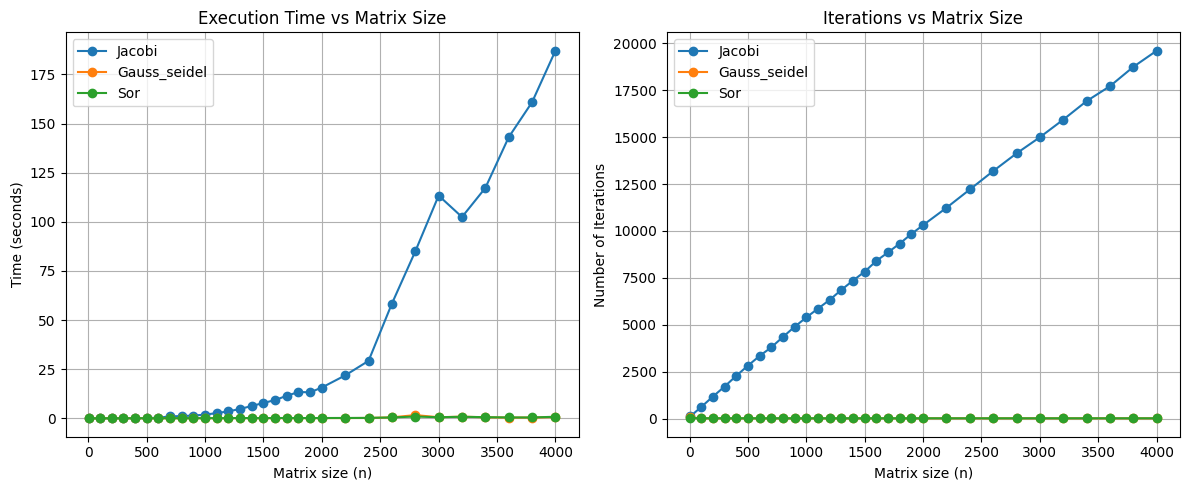

In [60]:
import matplotlib.pyplot as plt

# Plot timings
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for method in timings:
    plt.plot(sizes, timings[method], marker='o', label=method.capitalize())
plt.xlabel('Matrix size (n)')
plt.ylabel('Time (seconds)')
plt.title('Execution Time vs Matrix Size')
plt.legend()
plt.grid(True)

# Plot iterations
plt.subplot(1, 2, 2)
for method in iterations:
    plt.plot(sizes, iterations[method], marker='o', label=method.capitalize())
plt.xlabel('Matrix size (n)')
plt.ylabel('Number of Iterations')
plt.title('Iterations vs Matrix Size')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()